# Train accident Cluster Analysis

In [312]:
import sqlite3, csv
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
import warnings

In [356]:
warnings.filterwarnings("ignore")

In [314]:
df = pd.read_csv("1512168151216412.csv")
df = df.reset_index()
df = df.shift(periods=1, axis="columns")
cols = df.columns.tolist()
cs = pd.DataFrame(data = cols)
df.drop(columns = ['DUMMY7','DUMMY1','DIVISION','DUMMY2','DUMMY4','DUMMY5','METHOD','DUMMY6','IYR','index','YEAR4','DUMMY3'],inplace = True)
df.drop(columns = ['HEADEND1','MIDMAN1','MIDREM1','RMAN1','RREM1','HEADEND2','MIDMAN2','MIDREM2','RMAN2','RREM2','LOADF1','LOADP1','EMPTYF1','EMPTYP1','CABOOSE1',\
                   'LOADF2','LOADP2','EMPTYF2','EMPTYP2','CABOOSE2'],inplace = True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [79]:
df_clustering = df.loc[:,['RAILROAD','TRNSPD','PASSTRN','CARS']]

cause = list(np.zeros(len(df)))

for i in range(len(df)):
    cause[i] = df.CAUSE[i][0]

df_clustering['Cause'] = cause

Since a vast majority of trains are not passanger trains, let's say that the samples with missing 'PASSTRN' feature 
values are not passanger trains. 

In [357]:
for c,i in enumerate(df_clustering.PASSTRN):
    if (i != 'Y') and (i != 'N'):
        df_clustering.PASSTRN[c] = 'N'

Dataset:

In [360]:
df_clustering.head()

,RAILROAD,TRNSPD,PASSTRN,CARS,Cause
0,KYLE,8,N,0,H
1,UP,5,N,1,H
2,UP,0,N,0,H
3,CSX,15,N,0,M
4,UP,4,N,0,E


I picked out a few features for performing cluster analysis with. These include: 
- **RAILROAD**: the railroad company the accident is attributed to, 
- **TRNSPD**, the speed at which the train was going, 
- **PASSTRN**: whether the train was a passsenger train or a freight train 
- **CARS**: the number of train cars the train carried, and 
- **Cause**: The cause of the accident. This is one of the 5 categories: Here, H codes are human factors, T are "Track,Roadbed, and structure", E are mechanical and electrical failures, S is signal communication, and M are miscellaneous. Let's create a pie chart that captures the breakdown of accidents by their category.

I will perform cluster analysis on this dataset using the **K-Prototypes** algorithm. To determine how many clusters I will to split my data into, a plot of "Cost" vs. "Number of Clusters" is created.

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/50, moves: 0, ncost: 835024.5735163944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/50, moves: 0, ncost: 835024.5735163944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/50, moves: 0, ncost: 835024.5735163944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/50, moves: 0, ncost: 835024.5735163944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/50, moves: 0, ncost: 835024.5735163944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/50, moves: 0, ncost: 835024.5735163944
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run:

Run: 6, iteration: 4/50, moves: 152, ncost: 212969.84823047643
Run: 6, iteration: 5/50, moves: 40, ncost: 205526.7417792954
Run: 6, iteration: 6/50, moves: 13, ncost: 204455.04882770276
Run: 6, iteration: 7/50, moves: 8, ncost: 204108.4126943579
Run: 6, iteration: 8/50, moves: 2, ncost: 204067.12260285646
Run: 6, iteration: 9/50, moves: 1, ncost: 204051.14089017062
Run: 6, iteration: 10/50, moves: 0, ncost: 204051.14089017062
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/50, moves: 592, ncost: 218471.35250458732
Run: 7, iteration: 2/50, moves: 96, ncost: 204590.32851331975
Run: 7, iteration: 3/50, moves: 16, ncost: 204108.4126943579
Run: 7, iteration: 4/50, moves: 2, ncost: 204067.12260285646
Run: 7, iteration: 5/50, moves: 1, ncost: 204051.14089017062
Run: 7, iteration: 6/50, moves: 0, ncost: 204051.14089017062
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/50, moves: 299, ncos

Run: 8, iteration: 9/50, moves: 0, ncost: 175110.31363719958
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/50, moves: 210, ncost: 175461.66126773658
Run: 9, iteration: 2/50, moves: 180, ncost: 171722.19886657313
Run: 9, iteration: 3/50, moves: 126, ncost: 168089.77193064074
Run: 9, iteration: 4/50, moves: 188, ncost: 152941.13787867728
Run: 9, iteration: 5/50, moves: 74, ncost: 144606.36276631063
Run: 9, iteration: 6/50, moves: 35, ncost: 142298.79468301978
Run: 9, iteration: 7/50, moves: 10, ncost: 142148.5801345472
Run: 9, iteration: 8/50, moves: 9, ncost: 141972.89949158634
Run: 9, iteration: 9/50, moves: 5, ncost: 141929.70902529737
Run: 9, iteration: 10/50, moves: 0, ncost: 141929.70902529737
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/50, moves: 464, ncost: 186014.57646608367
Run: 10, iteration: 2/50, moves: 380, ncost: 177180.5464231095
Run: 10, iteration: 3/50, moves

Run: 10, iteration: 5/50, moves: 151, ncost: 133475.0043076247
Run: 10, iteration: 6/50, moves: 121, ncost: 120723.44351888921
Run: 10, iteration: 7/50, moves: 58, ncost: 115833.44525655892
Run: 10, iteration: 8/50, moves: 25, ncost: 114637.13012841313
Run: 10, iteration: 9/50, moves: 9, ncost: 114489.71854875023
Run: 10, iteration: 10/50, moves: 8, ncost: 114361.90899041368
Run: 10, iteration: 11/50, moves: 12, ncost: 113927.93537454764
Run: 10, iteration: 12/50, moves: 15, ncost: 113643.98772160745
Run: 10, iteration: 13/50, moves: 4, ncost: 113603.76934363833
Run: 10, iteration: 14/50, moves: 0, ncost: 113603.76934363833
Best run was number 10
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initia

Run: 10, iteration: 12/50, moves: 0, ncost: 100367.39627983072
Best run was number 2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/50, moves: 489, ncost: 102108.45875481384
Run: 1, iteration: 2/50, moves: 131, ncost: 93053.6435458577
Run: 1, iteration: 3/50, moves: 64, ncost: 88763.68775709833
Run: 1, iteration: 4/50, moves: 48, ncost: 85627.91983998344
Run: 1, iteration: 5/50, moves: 30, ncost: 82881.94317244983
Run: 1, iteration: 6/50, moves: 14, ncost: 82656.5214329556
Run: 1, iteration: 7/50, moves: 7, ncost: 82599.54353961948
Run: 1, iteration: 8/50, moves: 1, ncost: 82582.19789788473
Run: 1, iteration: 9/50, moves: 2, ncost: 82571.61563249986
Run: 1, iteration: 10/50, moves: 0, ncost

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/50, moves: 328, ncost: 96790.76705311218
Run: 2, iteration: 2/50, moves: 107, ncost: 92475.89842068206
Run: 2, iteration: 3/50, moves: 62, ncost: 90454.14461989616
Run: 2, iteration: 4/50, moves: 50, ncost: 89580.56675696952
Run: 2, iteration: 5/50, moves: 8, ncost: 89511.39042615524
Run: 2, iteration: 6/50, moves: 1, ncost: 89490.6423994638
Run: 2, iteration: 7/50, moves: 0, ncost: 89490.6423994638
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initi

Run: 9, iteration: 8/50, moves: 0, ncost: 69395.36775777044
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/50, moves: 575, ncost: 105894.39361082908
Run: 10, iteration: 2/50, moves: 304, ncost: 86539.07246855562
Run: 10, iteration: 3/50, moves: 172, ncost: 80632.99750901204
Run: 10, iteration: 4/50, moves: 46, ncost: 77628.13783178029
Run: 10, iteration: 5/50, moves: 75, ncost: 76766.98312156524
Run: 10, iteration: 6/50, moves: 61, ncost: 76262.48244508887
Run: 10, iteration: 7/50, moves: 68, ncost: 75704.13045766692
Run: 10, iteration: 8/50, moves: 124, ncost: 75456.47463866232
Run: 10, iteration: 9/50, moves: 3, ncost: 75456.27998246414
Run: 10, iteration: 10/50, moves: 0, ncost: 75456.27998246414
Best run was number 6
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centr

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
In

Run: 10, iteration: 4/50, moves: 24, ncost: 65253.444519861296
Run: 10, iteration: 5/50, moves: 2, ncost: 65213.1381417389
Run: 10, iteration: 6/50, moves: 0, ncost: 65213.1381417389
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: 

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
In

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/50, moves: 424, ncost: 72361.84504261284
Run: 8, iteration: 2/50, moves: 216, ncost: 66175.74782585925
Run: 8, iteration: 3/50, moves: 46, ncost: 63689.662626197365
Run: 8, iteration: 4/50, moves: 32, ncost: 61924.16669593677
Run: 8, iteration: 5/50, moves: 37, ncost: 60742.30097638572
Run: 8, iteration: 6/50, moves: 49, ncost: 58687.620155553865
Run: 8, iteration: 7/50, moves: 28, ncost: 56696.06154855993
Run: 8, iteration: 8/50, moves: 22, ncost: 55635.938137657264
Run: 8, iteration: 9/50, moves: 24, ncost: 54394.36996942693
Run: 8, iteration: 10/50, moves: 19, ncost: 53726.74433253987
Run: 8, iteration: 11/50, moves: 11, ncost: 53473.96294289389
Run: 8, iteration: 12/50, moves: 4, ncost: 53421.94933214558
Run: 8, it

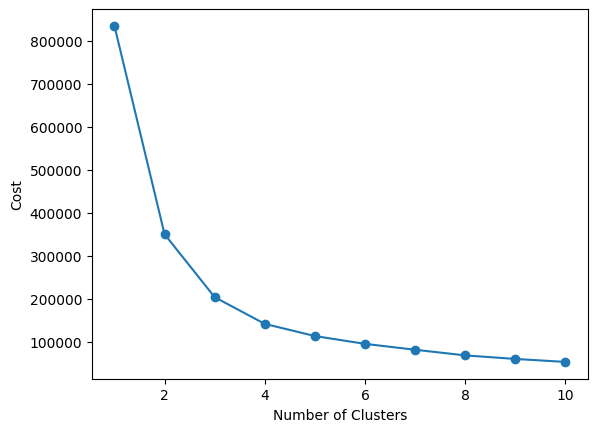

In [377]:
vals = df_clustering.values
categorical_features = [0,2,4]
scores = dict()

for k in range(1,11):
    
    kproto = KPrototypes(n_clusters = k, verbose=2, max_iter = 50, random_state = 0).fit(vals, categorical = categorical_features)
    scores[k] = kproto.cost_
 
plt.plot(scores.keys(), scores.values())
plt.scatter(scores.keys(), scores.values())
plt.xlabel("Number of Clusters") 
plt.ylabel("Cost") 
plt.show()

Although there is no clear "elbow", it seems like the rate of decrease of cost is more or less stabilized at 3 or 4 clusters. I will perform this algorithm with 2,3, and 4 clusters and compare the differences between them.

### With 2 clusters:

In [408]:
# Create 2 clusters
df_clustering_2 = df_clustering.copy()
vals = df_clustering_2.values
categorical_features = [0,2,4]
kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=100,random_state = 0)
clusters = kproto.fit_predict(vals, categorical=categorical_features)
df_clustering_2['cluster'] = list(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 30, ncost: 356337.79821022064
Run: 1, iteration: 2/100, moves: 6, ncost: 356201.6805397027
Run: 1, iteration: 3/100, moves: 1, ncost: 356195.0512138162
Run: 1, iteration: 4/100, moves: 0, ncost: 356195.0512138162
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 41, ncost: 356803.9164140782
Run: 2, iteration: 2/100, moves: 13, ncost: 356201.6805397027
Run: 2, iteration: 3/100, moves: 1, ncost: 356195.0512138162
Run: 2, iteration: 4/100, moves: 0, ncost: 356195.0512138162
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 251, ncost: 362299.8495279208
Run: 3, iteration: 2/100, moves: 47, ncost: 356641.63911146653
Run: 3, iteration: 3/100, moves: 14, ncost: 356195.0512138162
Run:

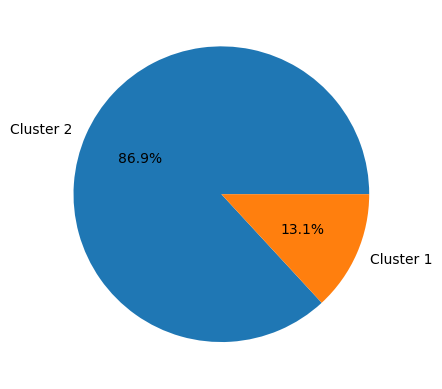

In [416]:
code_portions = [1899,287]
labels = ["Cluster 2", "Cluster 1"]
fig, ax = plt.subplots();
ax.pie(code_portions, labels=labels, autopct='%1.1f%%');

In [571]:
print('Cluster 1:','\n')
cluster1_cas = df_clustering_2.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)][df_clustering_2.cluster==0].index
print(df.loc[cluster1_cas,['TOTINJ','TOTKLD']].sum(),'\n')
print('Cluster 2:','\n')
cluster2_cas = df_clustering_2.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)][df_clustering_2.cluster==1].index
print(df.loc[cluster2_cas,['TOTINJ','TOTKLD']].sum(),'\n')

Cluster 1: 

TOTINJ    187
TOTKLD     43
dtype: int64 

Cluster 2: 

TOTINJ    52
TOTKLD     8
dtype: int64 



**Cluster 1**: Moderate train speed. Most common factors: Miscellaneos (by far most common). A mix of freight and passenger trains. Most common railroad companies: UP, ATK, and BNSF. Medium length. 

In short: Medium length, medium speed, misc factor, includes all passenger trains.

This cluster accounts for a disproportionately high number of deaths and injuries. This must be due to the passenger trains involved, and the accidents associated with Amtrack as seen in EDA. This correlation is better explored in the 3-cluster case.

**Cluster 2**: High train speed. Most common factors: Human (by far most common), then miscellaneous, and track. Consists of just freight trains (almost). Most common railroad companies: UP (by far most common), BNSF, NS, and CSX. Few cars.

In short: Short, fast, human factor

In [413]:
df_clustering_2['cluster'].value_counts()

1    1899
0     287
Name: cluster, dtype: int64

<Figure size 400x200 with 0 Axes>

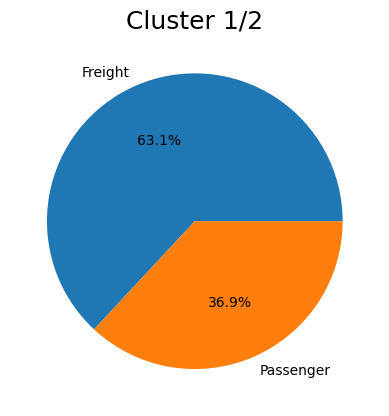

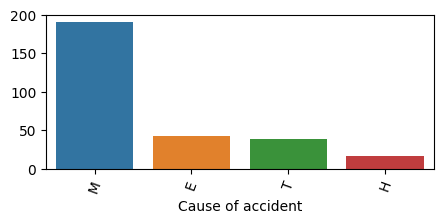

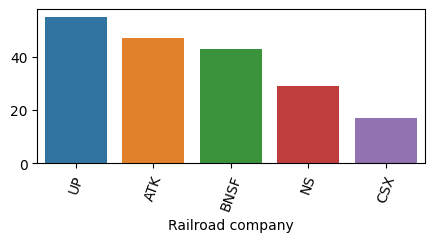

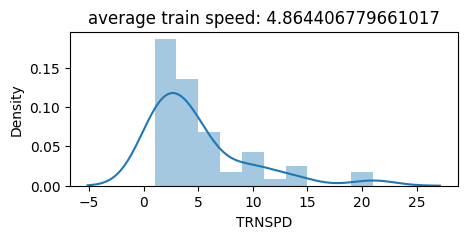

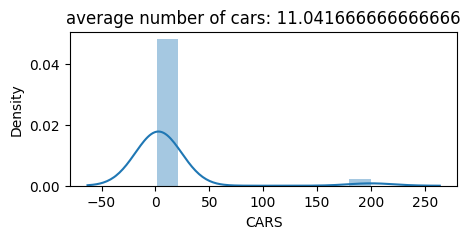

<Figure size 400x200 with 0 Axes>

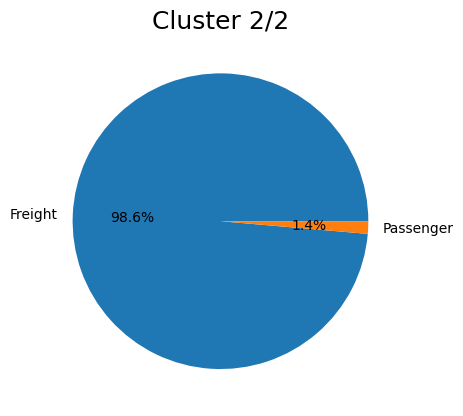

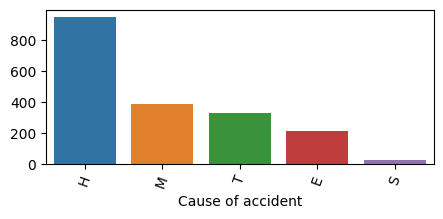

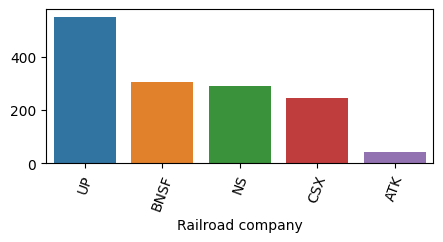

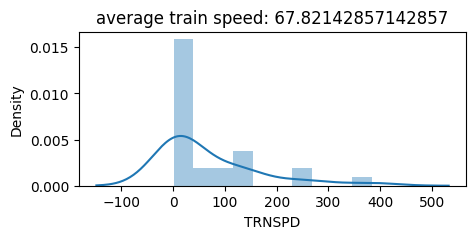

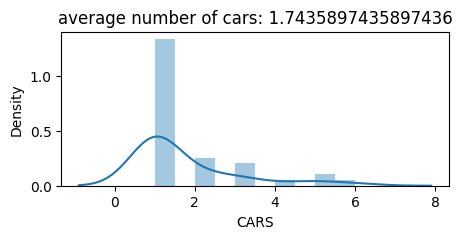

In [601]:
clusters = 2
for i in range(clusters):
    plt.figure(figsize = (4,2));
    code_portions = df_clustering_2[df_clustering_2.cluster == i].PASSTRN.value_counts().values
    labels = ["Freight", "Passenger"]
    fig, ax = plt.subplots();
    ax.pie(code_portions, labels=labels, autopct='%1.1f%%');
    plt.title("Cluster " + str(i+1) + "/2", fontsize = 18);

    plt.figure(figsize = (5,2))
    x = df_clustering_2[df_clustering_2.cluster == i].Cause.value_counts()[:5].index
    y = df_clustering_2[df_clustering_2.cluster == i].Cause.value_counts()[:5].values
    sns.barplot(data = df_clustering_2, x = x, y = y)
    plt.xticks(rotation = 70);
    plt.xlabel("Cause of accident");

    plt.figure(figsize = (5,2))
    x = df_clustering_2[df_clustering_2.cluster == i].RAILROAD.value_counts()[:5].index
    y = df_clustering_2[df_clustering_2.cluster == i].RAILROAD.value_counts()[:5].values
    sns.barplot(data = df_clustering_2, x = x, y = y)
    plt.xticks(rotation = 70);
    plt.xlabel("Railroad company");

    plt.figure(figsize = (5,2))
    sns.distplot(df_clustering_2[df_clustering_2.cluster == i].TRNSPD.value_counts(),bins = 10);
    plt.title('average train speed: ' + str(df_clustering_2[df_clustering_2['cluster'] == i].TRNSPD.value_counts().values.mean()))


    plt.figure(figsize = (5,2))
    sns.distplot(df_clustering_2[df_clustering_1.cluster == i].CARS.value_counts(),bins = 10);
    plt.title('average number of cars: ' + str(df_clustering_2[df_clustering_1['cluster'] == i].CARS.value_counts().values.mean()))


In [264]:
106/(106+181)

0.3693379790940767

### With 3 clusters:

In [430]:
df_clustering_1 = df_clustering.copy();
vals = df_clustering_1.values;
categorical_features = [0,2,4];
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=100, random_state = 0);
clusters = kproto.fit_predict(vals, categorical=categorical_features);
df_clustering_1['cluster'] = list(clusters);

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 143, ncost: 254467.1099320657
Run: 1, iteration: 2/100, moves: 117, ncost: 217217.07399353065
Run: 1, iteration: 3/100, moves: 45, ncost: 205668.64457635075
Run: 1, iteration: 4/100, moves: 12, ncost: 204622.2562113795
Run: 1, iteration: 5/100, moves: 6, ncost: 204329.10472654735
Run: 1, iteration: 6/100, moves: 2, ncost: 204292.49610683307
Run: 1, iteration: 7/100, moves: 0, ncost: 204292.49610683307
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 150, ncost: 292718.2686241777
Run: 2, iteration: 2/100, moves: 59, ncost: 265744.7303003677
Run: 2, iteration: 3/100, moves: 60, ncost: 260298.9730737403
Run: 2, iteration: 4/100, moves: 42, ncost: 255252.06236446998
Run: 2, iteration: 5/100, moves: 99, ncost: 217951.8005487561
Run: 2, iterat

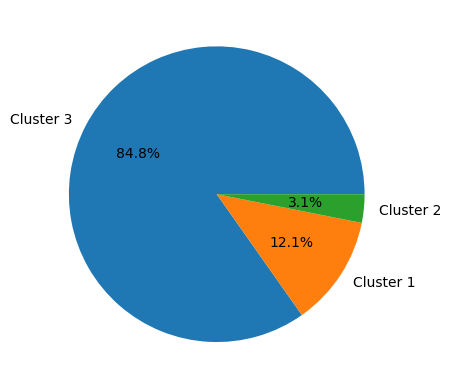

In [529]:
code_portions = [1853,265,68]
labels = ["Cluster 3", "Cluster 1", 'Cluster 2']
fig, ax = plt.subplots()
ax.pie(code_portions, labels=labels, autopct='%1.1f%%');

In [540]:
42/(42+1+8)

0.8235294117647058

In [584]:
print('Cluster 1:','\n')
cluster1_cas_1 = df_clustering_1.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)][df_clustering_1.cluster==0].index
print(df.loc[cluster1_cas_1,['TOTINJ','TOTKLD']].sum(),'\n')
print('Cluster 2:','\n')
cluster2_cas_1 = df_clustering_1.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)][df_clustering_1.cluster==1].index
print(df.loc[cluster1_cas_1,['TOTINJ','TOTKLD']].sum(),'\n')
print('Cluster 3:','\n')
cluster3_cas_1 = df_clustering_1.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)][df_clustering_1.cluster==2].index
print(df.loc[cluster1_cas_1,['TOTINJ','TOTKLD']].sum(),'\n')

Cluster 1: 

TOTINJ    180
TOTKLD     42
dtype: int64 

Cluster 2: 

TOTINJ    180
TOTKLD     42
dtype: int64 

Cluster 3: 

TOTINJ    180
TOTKLD     42
dtype: int64 



H_codes, M_codes, T_codes, E_codes, S_codes :

"Human Factors", "Miscellaneous", "Track", "Mechanical and Electrical", "Signal Communication,"

**Cluster 1**: Some train cars (just the train engine). Moderate train speed. Most common factors: Miscellaneous. A mix of passanger and freight trains (Passenger trains make up about 6 percent of all accidents. Here, it accounts for 40%). Most common railroad companies: UP, Amtrack, and BNSF.

In short: Medium length, moderate speed, misc. factor., includes all passenger trains.

Cluster 1 is responsible for a disproportionately large amount of total deaths and injuries (82 and 75 percent of the dataset, respectively), although it makes up only 12 percent of all accidents. I was also able to determine from reading the documentation within the dataset that the majority of accidents with deaths or injuries are due to collisions with other trains or vehicles (cars or trucks). The speeds of the trains indicated for these accidents is fairly how (around 30 MPH, however it is not clear whether it was recorded after an during the accident, in which case an emergency brake would have likely been activated. 

**Cluster 2**: Not a lot of train cars. Low train speed. Most common factors: Human, then Miscellaneous in second (half of "human"). No passenger trains. Most common railroad companies: UP (by far most common), NS, BNSF.

In short: Short, slow, human factor 

**Cluster 3**: Many train cars (just the train engine). High train speed. Most common factors: Human. No passenger trains. Most common railroad companies: UP (by far most common), BNSF, NS, CSX.

In short: Long, fast, human factor.

In [585]:
print('Cluster 1 accidents involving deaths and injuries:', '\n','\n')

rows = cluster1_cas_1 #df[df["VISIBLTY"]==4].index.tolist()
for i in rows:
    desc = ""
    for j in ["NARR1","NARR2","NARR3","NARR4","NARR5","NARR6","NARR7","NARR8","NARR9","NARR10","NARR11","NARR12","NARR13","NARR14","NARR15"]:
        if isinstance(df[j][i],str):
            desc += df[j][i] 
    print(i,df.loc[i,"RAILROAD"],'', df.loc[i,"TRNSPD"],'MPH',df.loc[i,"CAUSE"],df.loc[i,"TOTKLD"],df.loc[i,"TOTINJ"],'\n',desc)
    
    

Cluster 1 accidents involving deaths and injuries: 
 

93 BNSF  40 MPH M302 0 1 
 ZPHXCHI803 ON SINGLE MAIN TRACK STRUCK AN OCCUPIED AUTO THAT HAD PRECEDED THE GATES AND STOPPED ON THE HGX CROSSING. NO HAZMAT RELEASED.
130 UP  49 MPH M302 0 1 
 TRAIN IMNSI-19 HIT A SEMI TRUCK CARRYING RICE IN A TRAILER AT MP 54.4 OF THE BINKLEY SUB. THE TRUCKWAS STUCK ON THE TRACK AND COULD NOT MOVE. NO INJURIES.
163 ATK  62 MPH M308 1 0 
 GRADE CROSSING: TRAIN 19(16) WITH E/19-207, 7 CARS, 1 PRIVATE CAR STRUCK AN OCCUPIED VEHICLE AT CENTER STEET/MP 144.7 ON THE NS AGS SOUTH SUBDIVISION, THE VEHICLE HAD ONE OCCUPANT, WHO OPERATED AROUNDTHE DOWNED CROSSING GATES (DOT 728027Y) VEHICLE WAS A VAN, DRIVER DIED IN THE HOSPITAL TWO DAYS LATER.
178 CSX  30 MPH M302 0 1 
 T88828 STRUCK TRACTOR-TRAILER AT MP AN 764.42.  PROTECTION ALSO AT CROSSING: ADVANCE WARNING AND PAVEMENT MARKINGS (STOP LINES & RR XING SYMBOLS).
179 ATK  58 MPH M302 0 1 
 GRADE CROSSING: TRAIN 19(25), E/147, E/152, 7 CARS, STRUCK THE TRAILE

In [525]:
df_clustering_1['cluster'].value_counts()

2    1853
0     265
1      68
Name: cluster, dtype: int64

In [592]:
df_clustering_1[df_clustering_1.cluster == 0].CARS.value_counts()

0     200
1      11
7       7
5       6
13      5
4       4
10      4
2       3
8       3
12      2
14      2
26      2
19      2
6       2
3       2
9       2
17      1
16      1
21      1
23      1
24      1
25      1
30      1
15      1
Name: CARS, dtype: int64

<Figure size 400x200 with 0 Axes>

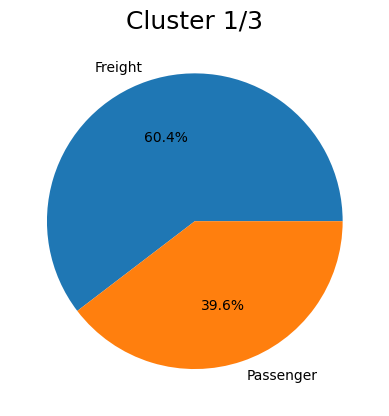

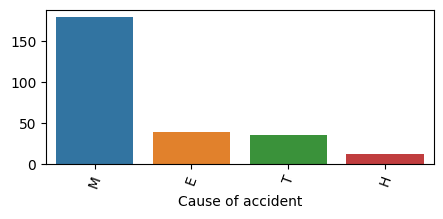

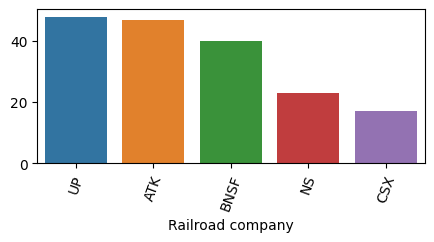

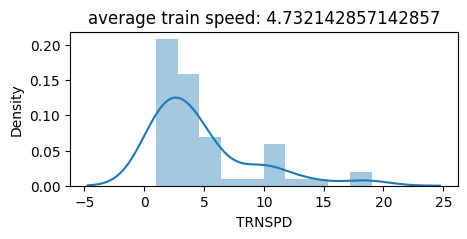

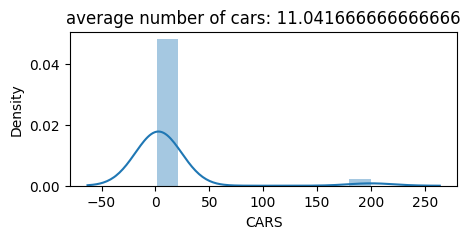

<Figure size 400x200 with 0 Axes>

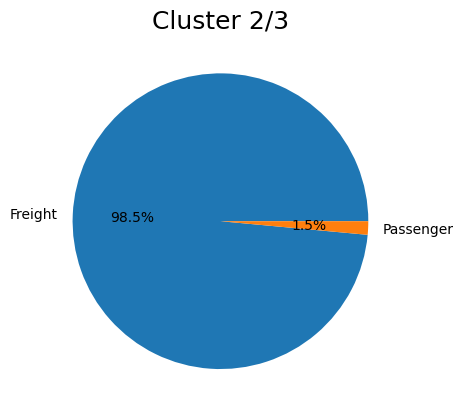

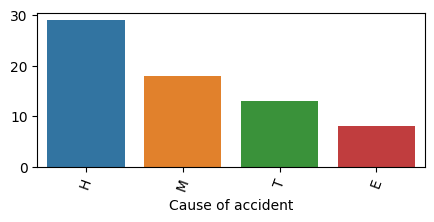

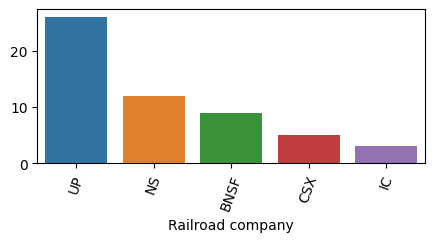

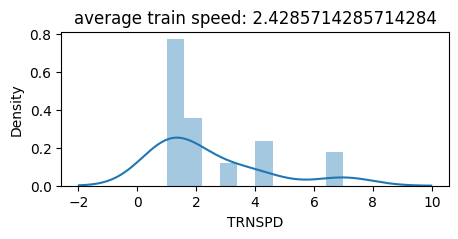

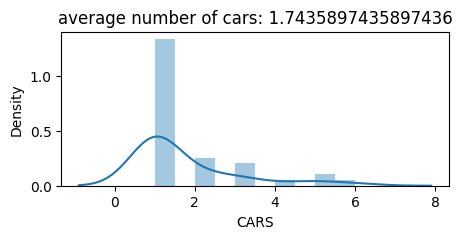

<Figure size 400x200 with 0 Axes>

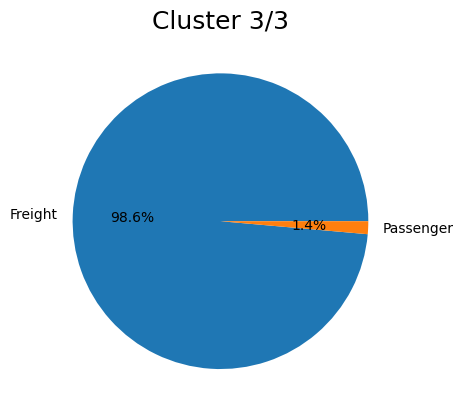

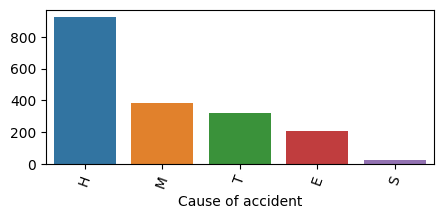

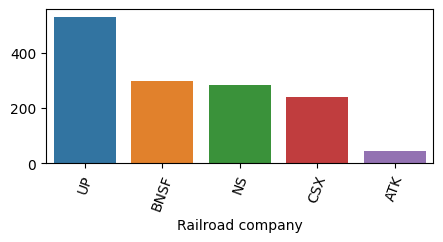

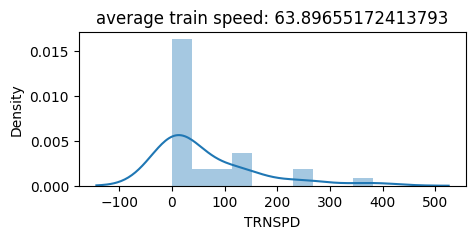

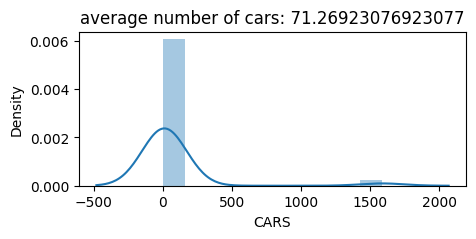

In [599]:
clusters = 3
for i in range(clusters):
    plt.figure(figsize = (4,2));
    code_portions = df_clustering_1[df_clustering_1.cluster == i].PASSTRN.value_counts().values
    labels = ["Freight", "Passenger"]
    fig, ax = plt.subplots();
    ax.pie(code_portions, labels=labels, autopct='%1.1f%%');
    plt.title("Cluster " + str(i+1) + "/3", fontsize = 18);

    plt.figure(figsize = (5,2));
    x = df_clustering_1[df_clustering_1.cluster == i].Cause.value_counts()[:5].index
    y = df_clustering_1[df_clustering_1.cluster == i].Cause.value_counts()[:5].values
    sns.barplot(data = df_clustering_1, x = x, y = y);
    plt.xticks(rotation = 70);
    plt.xlabel("Cause of accident");

    plt.figure(figsize = (5,2));
    x = df_clustering_1[df_clustering_1.cluster == i].RAILROAD.value_counts()[:5].index
    y = df_clustering_1[df_clustering_1.cluster == i].RAILROAD.value_counts()[:5].values
    sns.barplot(data = df_clustering_1, x = x, y = y);
    plt.xticks(rotation = 70);
    plt.xlabel("Railroad company");

    plt.figure(figsize = (5,2));
    sns.distplot(df_clustering_1[df_clustering_1.cluster == i].TRNSPD.value_counts(),bins = 10);
    plt.title('average train speed: ' + str(df_clustering_1[df_clustering_1['cluster'] == i].TRNSPD.value_counts().values.mean()))

    plt.figure(figsize = (5,2))
    sns.distplot(df_clustering_1[df_clustering_1.cluster == i].CARS.value_counts(),bins = 10);
    plt.title('average number of cars: ' + str(df_clustering_1[df_clustering_1['cluster'] == i].CARS.value_counts().values.mean()))


In [598]:
df_clustering_1[df_clustering_1['cluster'] == 2].CARS.value_counts()

0     1585
1       62
2       35
3       23
5       19
4       15
8       14
7       12
10      11
6        8
24       8
12       7
11       6
14       6
13       6
21       5
9        5
19       5
22       4
17       3
15       3
18       3
25       2
23       2
20       2
16       2
Name: CARS, dtype: int64

In [552]:
df_clustering_1[df_clustering_1['cluster'] == 2].TRNSPD.value_counts().values.mean()

63.89655172413793

### With 4 clusters:

In [412]:
df_clustering_3 = df_clustering
vals = df_clustering_3.values
categorical_features = [0,2,4]
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=100, random_state = 0)
clusters = kproto.fit_predict(vals, categorical=categorical_features)
df_clustering_3['cluster'] = list(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 172, ncost: 154409.96658073357
Run: 1, iteration: 2/100, moves: 54, ncost: 148861.2172249019
Run: 1, iteration: 3/100, moves: 26, ncost: 147634.81041497926
Run: 1, iteration: 4/100, moves: 10, ncost: 147455.21402163777
Run: 1, iteration: 5/100, moves: 8, ncost: 147312.42264977194
Run: 1, iteration: 6/100, moves: 12, ncost: 146897.571360255
Run: 1, iteration: 7/100, moves: 9, ncost: 146735.55560492774
Run: 1, iteration: 8/100, moves: 10, ncost: 146606.22669928824
Run: 1, iteration: 9/100, moves: 0, ncost: 146606.22669928824
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 64, ncost: 185734.9414503743
Run: 2, iteration: 2/100, moves: 18, ncost: 182023.32773391728
Run: 2, iteration: 3/100, moves: 7, ncost: 181116.66546368203
Run: 2, iterati

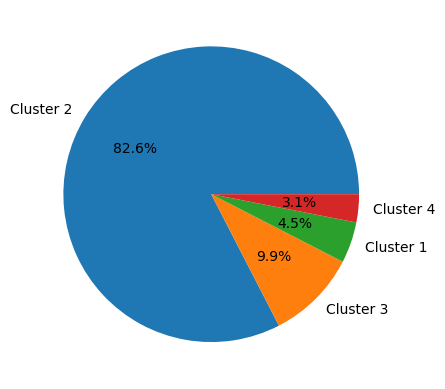

In [463]:
code_portions = [1805,216,98,67]
labels = ["Cluster 2", "Cluster 3", 'Cluster 1',  'Cluster 4']
fig, ax = plt.subplots()
ax.pie(code_portions, labels=labels, autopct='%1.1f%%');

In [586]:
print('Cluster 1:','\n')
cluster1_cas_3 = df_clustering_3.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)][df_clustering_3.cluster==0].index
print(df.loc[cluster1_cas,['TOTINJ','TOTKLD']].sum(),'\n')
print('Cluster 2:','\n')
cluster2_cas_3 = df_clustering_3.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)][df_clustering_3.cluster==1].index
print(df.loc[cluster2_cas,['TOTINJ','TOTKLD']].sum(),'\n')
print('Cluster 3:','\n')
cluster3_cas_3 = df_clustering_3.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)][df_clustering_3.cluster==2].index
print(df.loc[cluster3_cas,['TOTINJ','TOTKLD']].sum(),'\n')
print('Cluster 4:','\n')
cluster3_cas_3 = df_clustering_3.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)][df_clustering_3.cluster==3].index
print(df.loc[cluster3_cas,['TOTINJ','TOTKLD']].sum(),'\n')

Cluster 1: 

TOTINJ    180
TOTKLD     42
dtype: int64 

Cluster 2: 

TOTINJ    15
TOTKLD     1
dtype: int64 

Cluster 3: 

TOTINJ    44
TOTKLD     8
dtype: int64 

Cluster 4: 

TOTINJ    44
TOTKLD     8
dtype: int64 



**Cluster 1**: Not a lot train cars (just the train engine). Moderate train speed. By far the most common factor is Miscellaneous. A mix of passanger and freight trains (Passenger trains make up about 6 percent of all accidents. Here, it accounts for 21%). Most common railroad companies: Amtrack (by far the most common), then BLF, and BNSF.

In short: Medium lenght, medium speed, misc. factor, many passenger trains.

Once again, cluster 1 accounts for a disproportionately high number of casualties.

**Cluster 2**: Lots of train cars. Very high train speed. Most common factors: Human. Miscellaneous in second (half of "human"). Consists of freight cars. Most common railroad companies: UP (by far most common), BNSF, NS.

In short: Long, very fast, human factor, no passenger trains.

**Cluster 3**:  Medium train length. Moderate train speed. Most common factors: Miscellaneous. A mix of passanger and freight trains (Passenger trains make up about 6 percent of all accidents. Here, it accounts for 14%). Most common railroad companies: UP, BNSF, NS.

In short: Medium train lenght, medium speed, misc. factor, some passenger trains.

**Cluster 4**: Consists of freight trains. Contains a lot of of train cars. Low train speed. Most common factors: Human. Miscellaneous in second (half of "human"). Most common railroad companies: UP (by far most common), NS, BNSF.

In short: Short, slow, Human factor.

In [577]:
df_clustering_3['cluster'].value_counts()

1    1805
2     216
0      98
3      67
Name: cluster, dtype: int64

In [587]:
print('Cluster 1 accidents involving deaths and injuries:', '\n','\n')

rows = cluster1_cas_3 #df[df["VISIBLTY"]==4].index.tolist()
for i in rows:
    desc = ""
    for j in ["NARR1","NARR2","NARR3","NARR4","NARR5","NARR6","NARR7","NARR8","NARR9","NARR10","NARR11","NARR12","NARR13","NARR14","NARR15"]:
        if isinstance(df[j][i],str):
            desc += df[j][i] 
    print(i,df.loc[i,"RAILROAD"],'', df.loc[i,"TRNSPD"],'MPH',df.loc[i,"CAUSE"],df.loc[i,"TOTKLD"],df.loc[i,"TOTINJ"],'\n',desc)
    

Cluster 1 accidents involving deaths and injuries: 
 

163 ATK  62 MPH M308 1 0 
 GRADE CROSSING: TRAIN 19(16) WITH E/19-207, 7 CARS, 1 PRIVATE CAR STRUCK AN OCCUPIED VEHICLE AT CENTER STEET/MP 144.7 ON THE NS AGS SOUTH SUBDIVISION, THE VEHICLE HAD ONE OCCUPANT, WHO OPERATED AROUNDTHE DOWNED CROSSING GATES (DOT 728027Y) VEHICLE WAS A VAN, DRIVER DIED IN THE HOSPITAL TWO DAYS LATER.
179 ATK  58 MPH M302 0 1 
 GRADE CROSSING: TRAIN 19(25), E/147, E/152, 7 CARS, STRUCK THE TRAILER PORTION OF A TRACTOR TRAILERAT MP 267.22 ON THE NS AGS SOUTH DISTRICT.
638 ATK  72 MPH M308 0 3 
 GRADE CROSSING: TRAIN 2(18), E/84-E/2 & 7 CARS, WAS STRUCK BY A SEMI AT MP17.62, SOUTH CRAVENS ROADCROSSING ON THE UPRR GLIDDEN SUBDIVISION. TWO OCCUPANTS OF THE SEMI WERE TRANSPORTED TO LOCAL MEDICAL FACILITY.
639 TRE  77 MPH M301 2 0 
 ON FRIDAY 8/5/2022 AT APPROXIMATELY 2350HRS, TRE2963 WAS TRAVELING WESTBOUND APPROACHING ELLIOT REEDER RD CROSSING WHEN A VEHICLE ON THE NORTHSIDE OF THE CROSSING WENT AROUND THE GA

<Figure size 400x200 with 0 Axes>

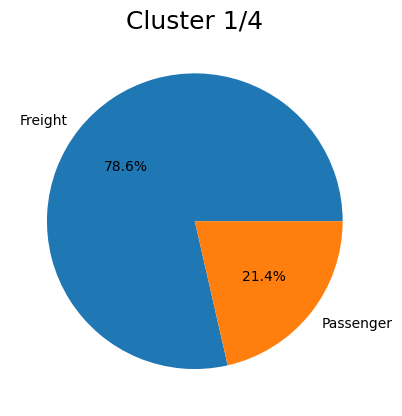

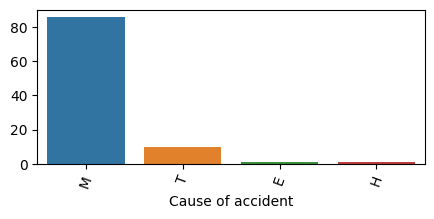

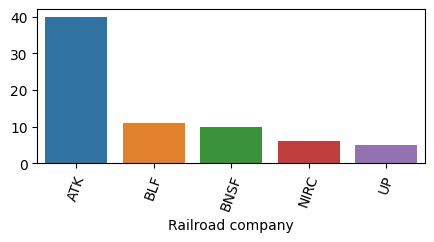

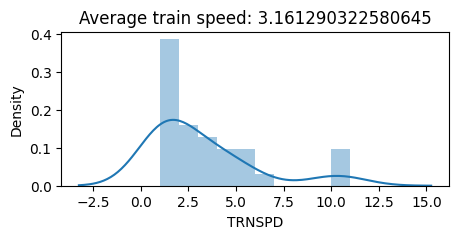

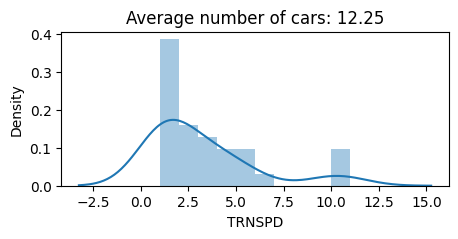

<Figure size 400x200 with 0 Axes>

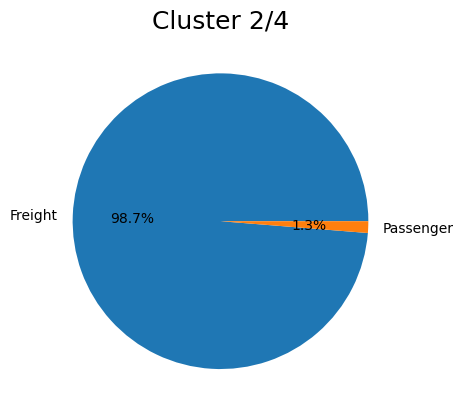

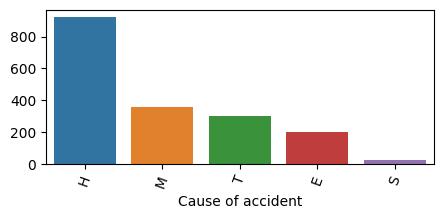

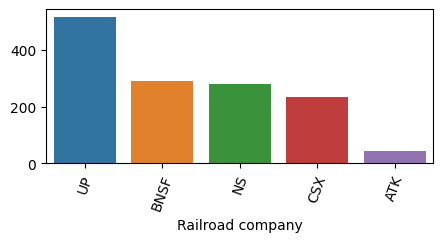

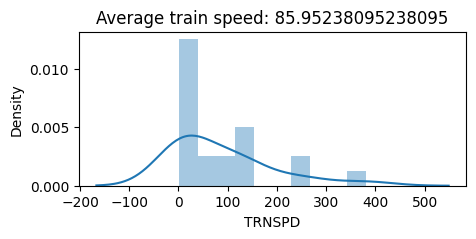

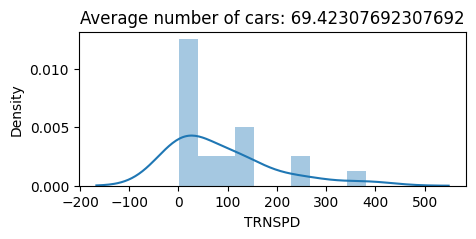

<Figure size 400x200 with 0 Axes>

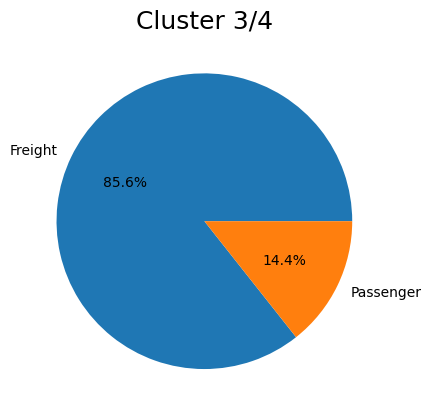

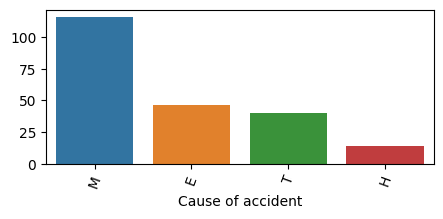

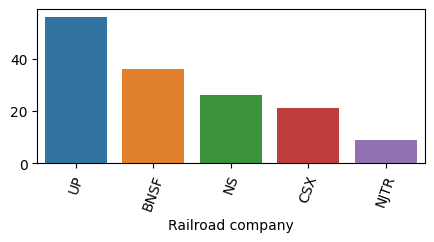

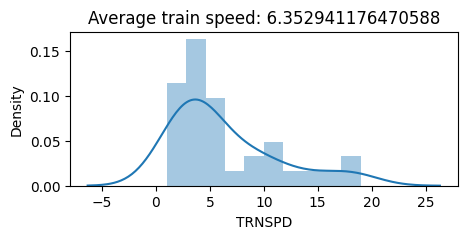

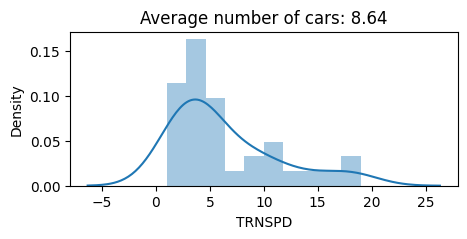

<Figure size 400x200 with 0 Axes>

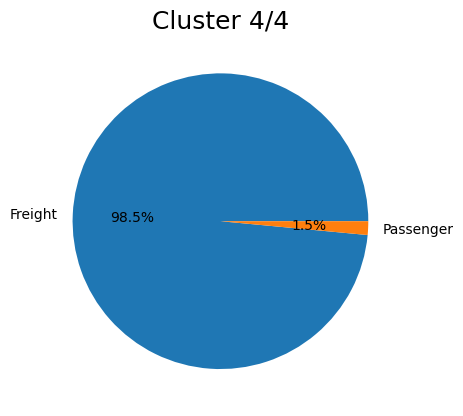

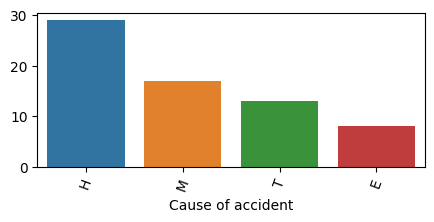

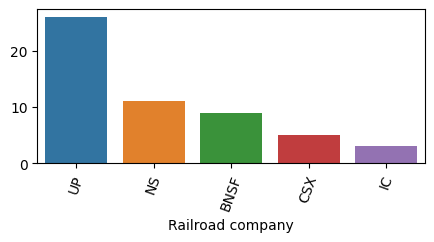

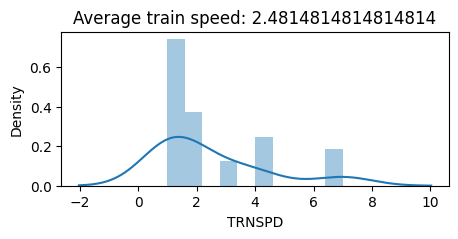

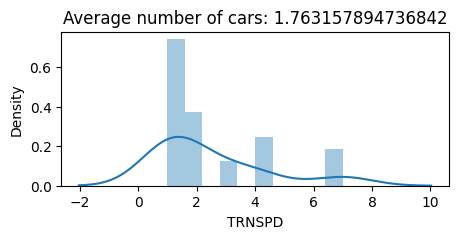

In [600]:
clusters = 4
for i in range(clusters):
    plt.figure(figsize = (4,2));
    code_portions = df_clustering_3[df_clustering_3.cluster == i].PASSTRN.value_counts().values
    labels = ["Freight", "Passenger"]
    fig, ax = plt.subplots();
    ax.pie(code_portions, labels=labels, autopct='%1.1f%%');
    plt.title("Cluster " + str(i+1) + "/4", fontsize = 18);

    plt.figure(figsize = (5,2));
    x = df_clustering_3[df_clustering_3.cluster == i].Cause.value_counts()[:5].index
    y = df_clustering_3[df_clustering_3.cluster == i].Cause.value_counts()[:5].values
    sns.barplot(data = df_clustering_3, x = x, y = y);
    plt.xticks(rotation = 70);
    plt.xlabel("Cause of accident");

    plt.figure(figsize = (5,2))
    x = df_clustering_3[df_clustering_3.cluster == i].RAILROAD.value_counts()[:5].index
    y = df_clustering_3[df_clustering_3.cluster == i].RAILROAD.value_counts()[:5].values
    sns.barplot(data = df_clustering_3, x = x, y = y)
    plt.xticks(rotation = 70);
    plt.xlabel("Railroad company");

    plt.figure(figsize = (5,2))
    sns.distplot(df_clustering_3[df_clustering_3.cluster == i].TRNSPD.value_counts(),bins = 10);
    plt.title('Average train speed: ' + str(df_clustering_3[df_clustering_3['cluster'] == i].TRNSPD.value_counts().values.mean()))

    plt.figure(figsize = (5,2))
    sns.distplot(df_clustering_3[df_clustering_3.cluster == i].TRNSPD.value_counts(),bins = 10);
    plt.title('Average number of cars: ' + str(df_clustering_3[df_clustering_3['cluster'] == i].CARS.value_counts().values.mean()))


# Conclusion:

The **3-cluster-model** made the most sense to me as I could see 3 distinct categories of trains. These are: 

- Trains with fewer cars, moving at low speeds, non-passenger
- Trains with many cars, moving at high speeds, non-passenger
- Trains with some slow, some fast cars, involving passenger and non-passenger trains

Going to 4 clusters, the last of those categories split up into 2 clusters without any additional insight.

I have noticed a tendency in all of these clustering models that accidents involving non-passenger trains carrying few cars and going at low speeds happen due to human error. These must be locomotives being moved short distances at the the rail yard. Interestingly enough, non-passenger trains with many cars and moving at high speeds also happen due to human error. The reason for this is less clear, however the clusters with these characteristics were much larger than the rest (at least 80% of the dataset), so there must be other variables not accounted for in this clusted analysis that explain this tendancy.

However, accidents in clusters with some or all passenger trains happen due to miscellaneous reasons. The reasons primarily being the innatentiveness of car drivers on the highway, as was discovered during EDA. 

It seems like injuries and deaths could be attributed primarily to the last cluster category, in which there are passenger (Amtrack) trains.

Text(0.5, 1.0, 'Average train speed: 52.17424242424242')

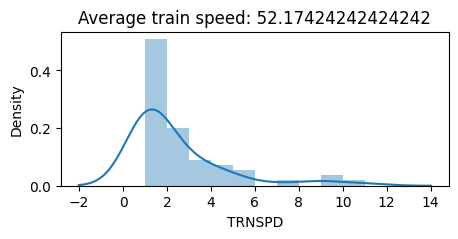

In [612]:
plt.figure(figsize = (5,2))
sns.distplot(df[df.PASSTRN == 'Y'].TRNSPD.value_counts(),bins = 10);
plt.title('Average train speed: '+ str(df[df.PASSTRN == 'Y'].TRNSPD.mean()))

Text(0.5, 1.0, 'Average train speed: 8.932299741602067')

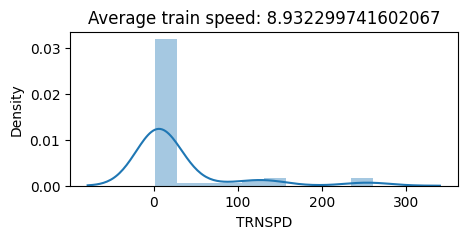

In [613]:
plt.figure(figsize = (5,2))
sns.distplot(df[df.PASSTRN == 'N'].TRNSPD.value_counts(),bins = 10);
plt.title('Average train speed: '+ str(df[df.PASSTRN == 'N'].TRNSPD.mean()))

I have explored quite a bit of factors related to train accidents, and it is 